In [1]:
%pylab inline

import gc
import pdet
import fpfs
import fitsio
import pltutil
import numpy as np
import numpy.lib.recfunctions as rfn
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib
Do not have lsst pipeline!


In [2]:
# merge data from n fields
out1=[]
out2=[]
for _i in range(125):
    _a1=fitsio.read('../../sim/src_basicCenter-var0em0/psf60/fpfs-cut16-%04d-g1-0000.fits' %_i)
    _a2=fitsio.read('../../sim/src_basicCenter-var0em0/psf60/fpfs-cut16-%04d-g1-2222.fits' %_i)
    out1.append(_a1)
    out2.append(_a2)
out1 =   rfn.stack_arrays(out1,usemask=False)
out2 =   rfn.stack_arrays(out2,usemask=False)
    
gc.collect()
ell1=fpfs.fpfsBase.fpfsM2E(out1,const=100)
ell2=fpfs.fpfsBase.fpfsM2E(out2,const=100)

In [3]:
y1=[]
y2=[]
pn='v22'
dcc=0.03
expres1=ell1['fpfs_e1']*out1['pdet_%sr1' %pn]
expres2=ell2['fpfs_e1']*out2['pdet_%sr1' %pn]
for i in range(0,10):
    cut=0.2*i
    msk1 = out1['pdet_%s' %pn]>cut
    cor1 = pdet.detbias(out1['pdet_%s' %pn],expres1,cut,dcc)
    msk2 = out2['pdet_%s' %pn]>cut
    cor2 = pdet.detbias(out2['pdet_%s' %pn],expres2,cut,dcc)
    de   = np.sum(ell2[msk2]['fpfs_e1'])-np.sum(ell1[msk1]['fpfs_e1'])
    rave = (np.sum(ell2[msk2]['fpfs_RE'])+np.sum(ell1[msk1]['fpfs_RE']))/2.
    raveR= (np.sum(ell2[msk2]['fpfs_RE'])+np.sum(ell1[msk1]['fpfs_RE'])+cor1+cor2)/2.
    y1.append(de/rave/0.04-1)
    y2.append(de/raveR/0.04-1)
    del msk1,msk2
gc.collect()

0

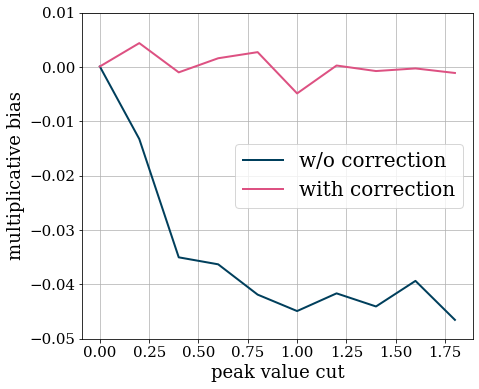

In [4]:
cuts=np.arange(0,2,0.2)
plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.plot(cuts,np.array(y1),label='w/o correction',color=pltutil.colors[0])
ax.plot(cuts,np.array(y2),label='with correction',color=pltutil.colors[1])
ax.set_xlabel('peak value cut')
ax.set_ylabel('multiplicative bias')
ax.set_ylim(-0.05,0.01)
ax.grid()
ax.legend()

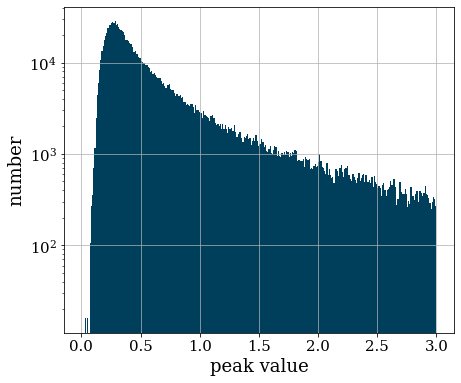

In [5]:
plt.close()
fig,axes=pltutil.make_figure_axes(1,1)
ax=axes[0]
ax.hist(out1['pdet_%s' %pn],range=(0,3),bins=300,color=pltutil.colors[0])
ax.set_yscale('log')
ax.set_xlabel('peak value')
ax.set_ylabel('number')
ax.grid()